In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
import cv2
from pca import *

# Task 1

read and plot data

In [2]:
data1 = pd.read_csv("pca_dataset.txt", delimiter=" ", header=None).to_numpy()

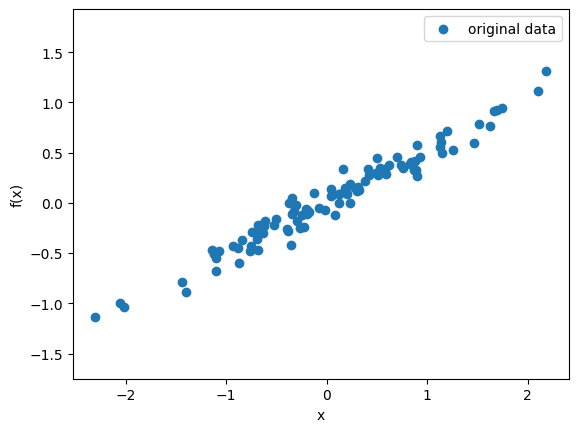

In [3]:
plt.scatter(data1[:, 0], data1[:, 1], label='original data')
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

Center the data

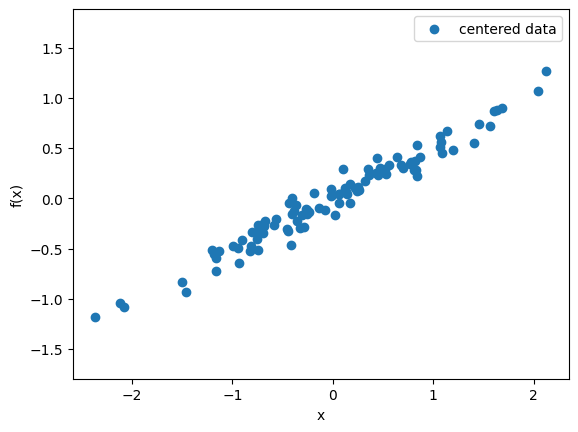

In [4]:
data1_mean = data1.mean(axis=0)
data1_centered = data1 - data1_mean
plt.scatter(data1_centered[:, 0], data1_centered[:, 1], label='centered data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axis("equal")
plt.legend()

svd and calculate the energy for each component

In [5]:
U1, S1, Vh1, energy1 = pca(data1) 

add the direction of the two principal components

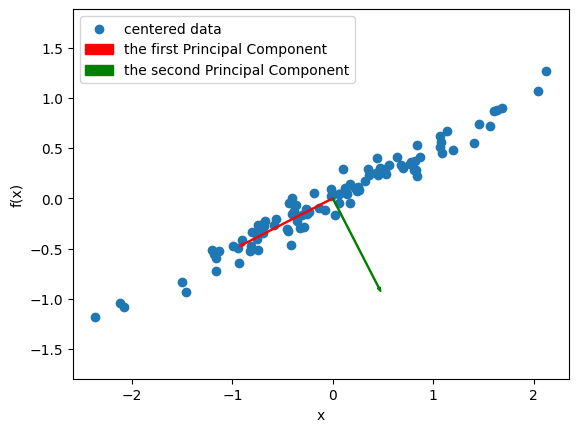

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data1_centered[:, 0], data1_centered[:, 1], label='centered data')
ax.arrow(0, 0, Vh1[0,0], Vh1[0,1], width = 0.01, label="the first Principal Component", color='red')# the first principal component
ax.arrow(0, 0, Vh1[1,0], Vh1[1,1], width = 0.01, label="the second Principal Component", color='green')# the second principal component
ax.axis("equal")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()

In [7]:
pc1_energy = energy1[0]
pc2_energy = energy1[1]
print(f"the first Principal Component contains energy: {round(pc1_energy*100, 2)}%")
print(f"the second Principal Component contains energy: {round(pc2_energy*100, 2)}%")

the first Principal Component contains energy: 99.31%
the second Principal Component contains energy: 0.69%


# Task 2

load and rescale the image

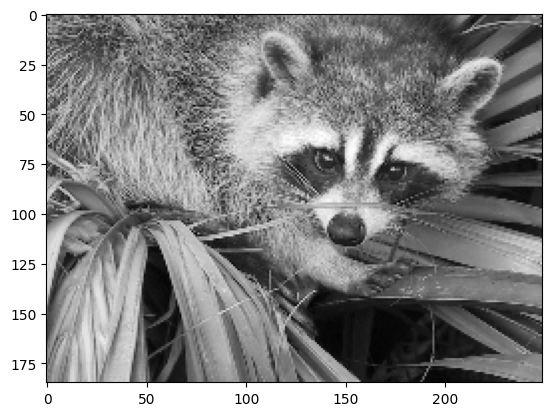

In [8]:
data2 = scipy.misc.face(gray=True)
data2 = cv2.resize(data2, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)
plt.imshow(data2, cmap='gray')

svd and calculate the energy for each component

In [9]:
U2, S2, Vh2, energy2 = pca(data2)

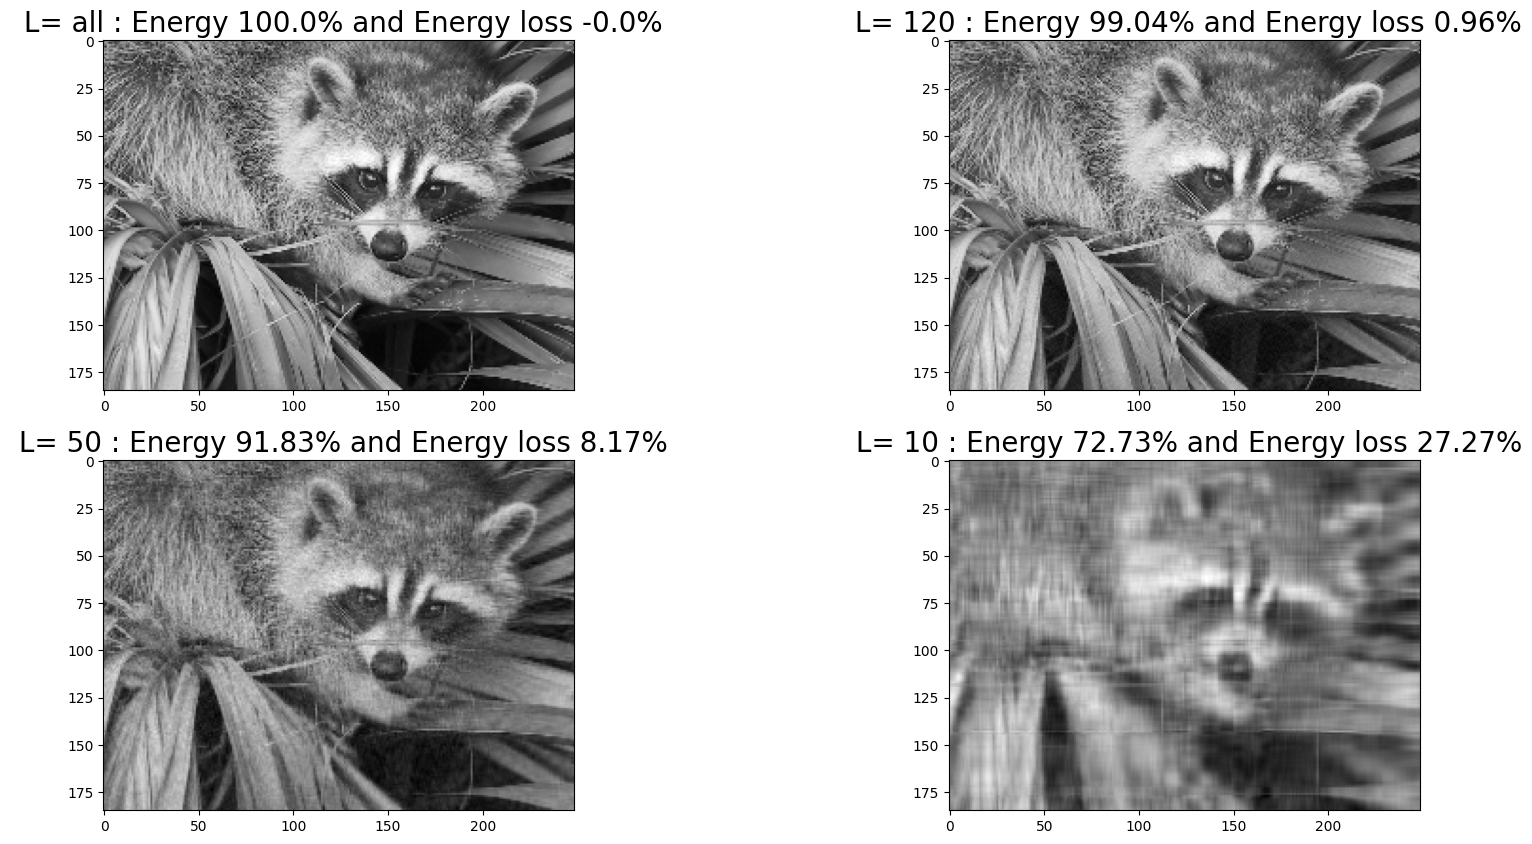

In [10]:
fig = plt.figure(figsize=(20,10))

L = [0, 120, 50, 10]
for i, l in enumerate(L):
    S_new = S2

    if i != 0:
        S2[l:, l:] = 0
        energy = np.sum(energy2[:l])
    else:
        energy = np.sum(energy2[:])

    energy_loss = (1 - energy)

    date2_reconstructed = (U2 @ S_new @ Vh2) + data2.mean(axis=0)

    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(date2_reconstructed, cmap='gray')
    ax.set_title(" L= {0} : Energy {1}% and Energy loss {2}%"
                 .format(l if l!=0 else"all", round(energy*100,2), round(energy_loss*100,2)), fontsize=20)

In [11]:
# calculate how many principal components are needed to make energy lost smaller than 1%
for n in range(0, S2.shape[1]):
      energy = np.sum(energy2[:n])
      energy_loss = (1 - energy)
      if energy_loss <= 0.01:
            print(f"we need at least {n} principal components to make energy lost smaller than 1%.")
            print(f"{n} principal components lost {round(energy_loss*100,2)}% of the energy")
            break

we need at least 120 principal components to make energy lost smaller than 1%.
120 principal components lost 0.96% of the energy


# Task 3

In [12]:
data3 = pd.read_csv('data_DMAP_PCA_vadere.txt', delimiter=" ", header=None).to_numpy()
data3.shape


(1000, 30)

In [13]:
ped1 = data3[:, 0:2]
ped2 = data3[:, 2:4]

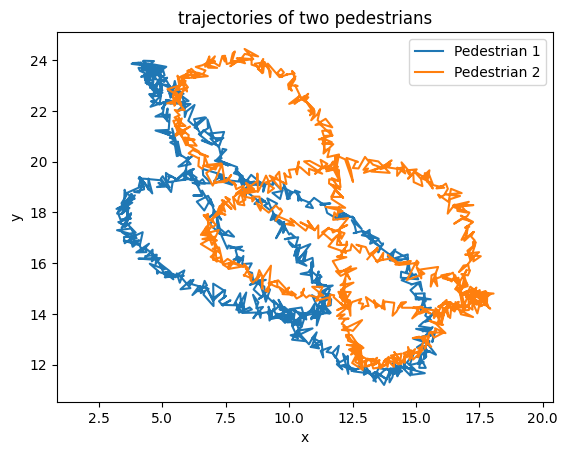

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ped1[:, 0], ped1[:, 1], label="Pedestrian 1")
ax.plot(ped2[:, 0], ped2[:, 1], label="Pedestrian 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
ax.set_title("trajectories of two pedestrians")
ax.legend()


In [15]:
U3, S3, Vh3, energy3 = pca(data3)

S3[2:, 2:] = 0
energy = np.sum(energy3[:2])
energy_loss = (1 - energy)

date3_reconstructed = (U3 @ S3 @ Vh3) + data3.mean(axis=0)

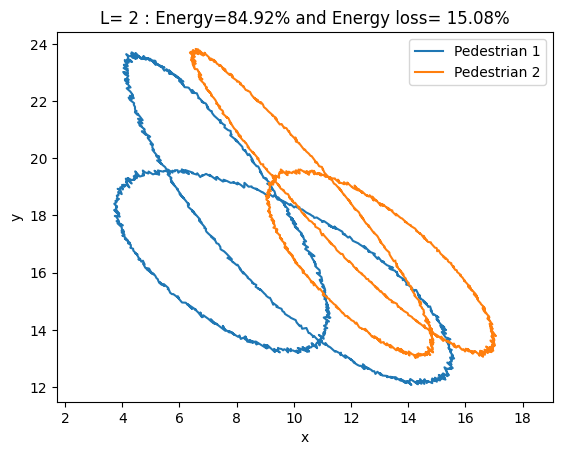

In [16]:
ped1 = date3_reconstructed[:, 0:2]
ped2 = date3_reconstructed[:, 2:4]

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ped1[:, 0], ped1[:, 1], label="Pedestrian 1")
ax.plot(ped2[:, 0], ped2[:, 1], label="Pedestrian 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
ax.set_title(f"L= 2 : Energy={round(energy*100,2)}% and Energy loss= {round(energy_loss*100,2)}%")
ax.legend()

In [17]:
# calculate how many principal components are needed to capture 90% energy
for n in range(0, S3.shape[1]):
      energy = np.sum(energy3[:n])
      if energy >= 0.9:
            print(f"we need {n} principal components to capture most of the energy.")
            print(f"{n} principal components capture {round(energy*100,2)}% of the energy")
            break

we need 3 principal components to capture most of the energy.
3 principal components capture 99.71% of the energy
